#**EDA on Data Science Job Market & Salaries 2024**

[Link to dataset](https://www.kaggle.com/datasets/muhammadehsan000/data-science-job-market-and-salaries-2024/data)

In [84]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv('/content/Data-Science-Jobs.csv')

In [86]:
df.head()

,Position,Job Title,Company Name,Location,Salary,Date,Logo,Job Link,Company Rating
0,1,Associate Stop Loss Underwriter,The Insurance Center\n2.7,"Onalaska, WI",$57K - $84K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/453835/the-ins...,https://www.glassdoor.com/partner/jobListing.h...,2.7
1,2,Manager of Data Science,"Nuvative, Inc.\n3.4","Wichita, KS",$106K - $157K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/1384674/net-pa...,https://www.glassdoor.com/partner/jobListing.h...,3.4
2,3,Senior Data Product Manager,ProviderTrust\n4.2,"Nashville, TN",$105K - $141K (Glassdoor est.),11d,https://media.glassdoor.com/sql/1953857/hibob-...,https://www.glassdoor.com/partner/jobListing.h...,4.2
3,4,Oncology Nurse Navigator,Inizio Engage\n3.6,"Portland, OR",$90K - $113K (Employer est.),1d,https://media.glassdoor.com/sql/8794153/inizio...,https://www.glassdoor.com/partner/jobListing.h...,3.6
4,5,Head of Artificial Intelligence – Americas Region,Covestro\n3.6,"Pittsburgh, PA",$89K - $148K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/27128/covestro...,https://www.glassdoor.com/partner/jobListing.h...,3.6


In [87]:
df.columns

Index(['Position', 'Job Title', 'Company Name', 'Location', 'Salary', 'Date',
       'Logo', 'Job Link', 'Company Rating'],
      dtype='object')

In [88]:
df['Company Name'] = df['Company Name'].str.split("\n").str[0]

Removing unwanted text at company name

In [90]:
df.head()

,Position,Job Title,Company Name,Location,Salary,Date,Logo,Job Link,Company Rating
0,1,Associate Stop Loss Underwriter,The Insurance Center,"Onalaska, WI",$57K - $84K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/453835/the-ins...,https://www.glassdoor.com/partner/jobListing.h...,2.7
1,2,Manager of Data Science,"Nuvative, Inc.","Wichita, KS",$106K - $157K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/1384674/net-pa...,https://www.glassdoor.com/partner/jobListing.h...,3.4
2,3,Senior Data Product Manager,ProviderTrust,"Nashville, TN",$105K - $141K (Glassdoor est.),11d,https://media.glassdoor.com/sql/1953857/hibob-...,https://www.glassdoor.com/partner/jobListing.h...,4.2
3,4,Oncology Nurse Navigator,Inizio Engage,"Portland, OR",$90K - $113K (Employer est.),1d,https://media.glassdoor.com/sql/8794153/inizio...,https://www.glassdoor.com/partner/jobListing.h...,3.6
4,5,Head of Artificial Intelligence – Americas Region,Covestro,"Pittsburgh, PA",$89K - $148K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/27128/covestro...,https://www.glassdoor.com/partner/jobListing.h...,3.6


In [91]:
df['Salary'].value_counts()

,count
Salary,
$127K - $177K (Employer est.),12
$150K - $210K (Employer est.),8
$20.00 Per Hour (Employer est.),7
$62K - $107K (Employer est.),6
$86K - $120K (Employer est.),5
...,...
$129K - $219K (Employer est.),1
$63K - $89K (Employer est.),1
$164K - $209K (Glassdoor est.),1


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Position        500 non-null    int64  
 1   Job Title       500 non-null    object 
 2   Company Name    500 non-null    object 
 3   Location        500 non-null    object 
 4   Salary          438 non-null    object 
 5   Date            500 non-null    object 
 6   Logo            436 non-null    object 
 7   Job Link        500 non-null    object 
 8   Company Rating  439 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 35.3+ KB


I am removing the null salary by assuming that the company have their own salary system and the 87.6% of the data are still preserved. Therefore, I am moving forward with 87.6% of the data.

In [102]:
df_final = df.dropna(subset=['Salary'])
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Position        438 non-null    int64  
 1   Job Title       438 non-null    object 
 2   Company Name    438 non-null    object 
 3   Location        438 non-null    object 
 4   Salary          438 non-null    object 
 5   Date            438 non-null    object 
 6   Logo            388 non-null    object 
 7   Job Link        438 non-null    object 
 8   Company Rating  392 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 34.2+ KB


Here I am writing a function to convert hourly salary into annual salary by assuming the company runs for 40 hours a week, and 5 days per week.

In [103]:
import re
def convert_hourly_to_annual(salary):
    if isinstance(salary, str):
        range_match = re.search(r'\$(\d+\.\d{2})\s*-\s*\$(\d+\.\d{2})\s*Per Hour', salary, re.IGNORECASE)
        single_match = re.search(r'\$(\d+\.\d{2})\s*Per Hour', salary, re.IGNORECASE)

        if range_match:
            hourly_low = float(range_match.group(1))
            hourly_high = float(range_match.group(2))
            annual_low = hourly_low * 52 * 5
            annual_high = hourly_high * 52 * 5
            return f"${int(annual_low/1000)}K - ${int(annual_high/1000)}K (Employer est.)"

        elif single_match:
            hourly = float(single_match.group(1))
            annual = hourly * 52 * 5
            return f"${int(annual/1000)}K (Employer est.)"

    return salary

In [104]:
df_final['Salary'] = df_final['Salary'].apply(convert_hourly_to_annual)

<ipython-input-104-fb5c3b1150bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Salary'] = df_final['Salary'].apply(convert_hourly_to_annual)


In [98]:
df_final.head(10)

,Position,Job Title,Company Name,Location,Salary,Date,Logo,Job Link,Company Rating
0,1,Associate Stop Loss Underwriter,The Insurance Center,"Onalaska, WI",$57K - $84K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/453835/the-ins...,https://www.glassdoor.com/partner/jobListing.h...,2.7
1,2,Manager of Data Science,"Nuvative, Inc.","Wichita, KS",$106K - $157K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/1384674/net-pa...,https://www.glassdoor.com/partner/jobListing.h...,3.4
2,3,Senior Data Product Manager,ProviderTrust,"Nashville, TN",$105K - $141K (Glassdoor est.),11d,https://media.glassdoor.com/sql/1953857/hibob-...,https://www.glassdoor.com/partner/jobListing.h...,4.2
3,4,Oncology Nurse Navigator,Inizio Engage,"Portland, OR",$90K - $113K (Employer est.),1d,https://media.glassdoor.com/sql/8794153/inizio...,https://www.glassdoor.com/partner/jobListing.h...,3.6
4,5,Head of Artificial Intelligence – Americas Region,Covestro,"Pittsburgh, PA",$89K - $148K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/27128/covestro...,https://www.glassdoor.com/partner/jobListing.h...,3.6
5,6,IT Manager,Western Welding Academy,"Gillette, WY",$90K (Employer est.),26d,NaN,https://www.glassdoor.com/partner/jobListing.h...,NaN
6,7,"Data Center Services Technician - IT, Crypto M...",Growler Mining,"Tuscaloosa, AL",$5K - $7K (Employer est.),30d+,NaN,https://www.glassdoor.com/partner/jobListing.h...,NaN
7,8,Data Center Construction Coordinator,Applied Digital,"Ellendale, ND",$58K - $80K (Employer est.),23d,NaN,https://www.glassdoor.com/partner/jobListing.h...,NaN
8,9,Senior AIOps Engineer,Health Data Analytics Institute,"Dedham, MA",$151K - $175K (Employer est.),30d+,https://media.glassdoor.com/sql/3037378/health...,https://www.glassdoor.com/partner/jobListing.h...,4.4
10,11,Principal Data Scientist,HelloGov,"Tampa, FL",$166K - $245K (Employer est.),13d,NaN,https://www.glassdoor.com/partner/jobListing.h...,NaN


I am showing the top 15 Data Science jobs preffered by people.

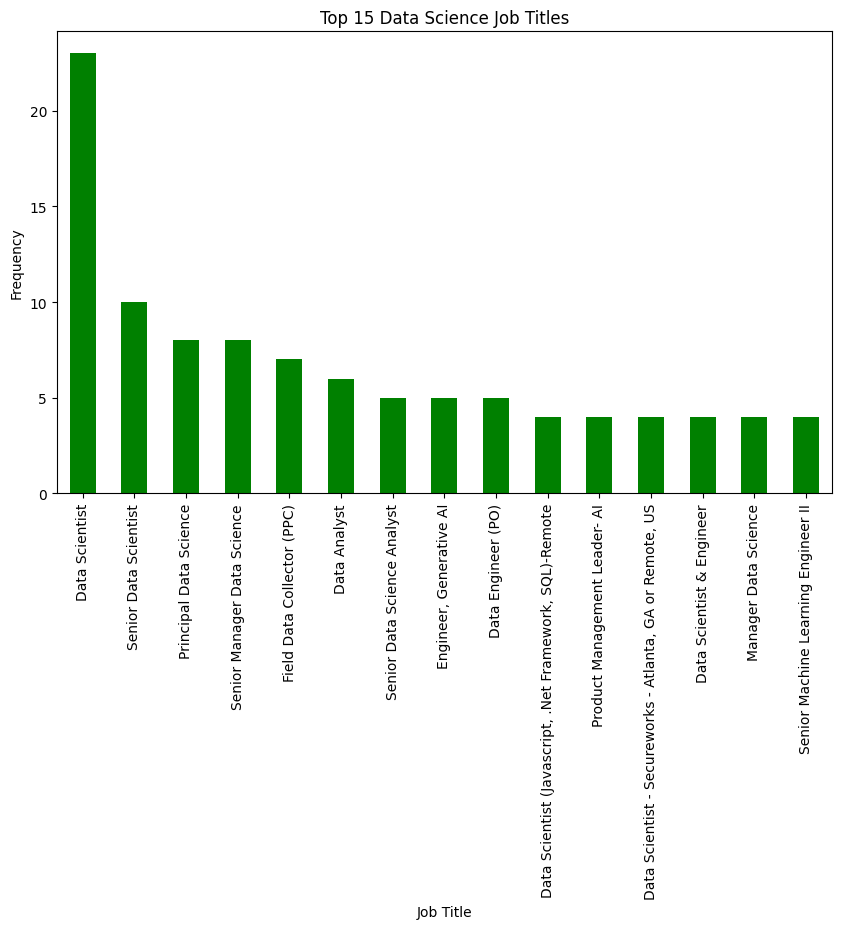

In [99]:
top_jobs_counts = df_final['Job Title'].value_counts().head(15)

plt.figure(figsize=(10,6))
top_jobs_counts.plot(kind='bar', color='green')
plt.title('Top 15 Data Science Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Hotspot for Data Science Jobs

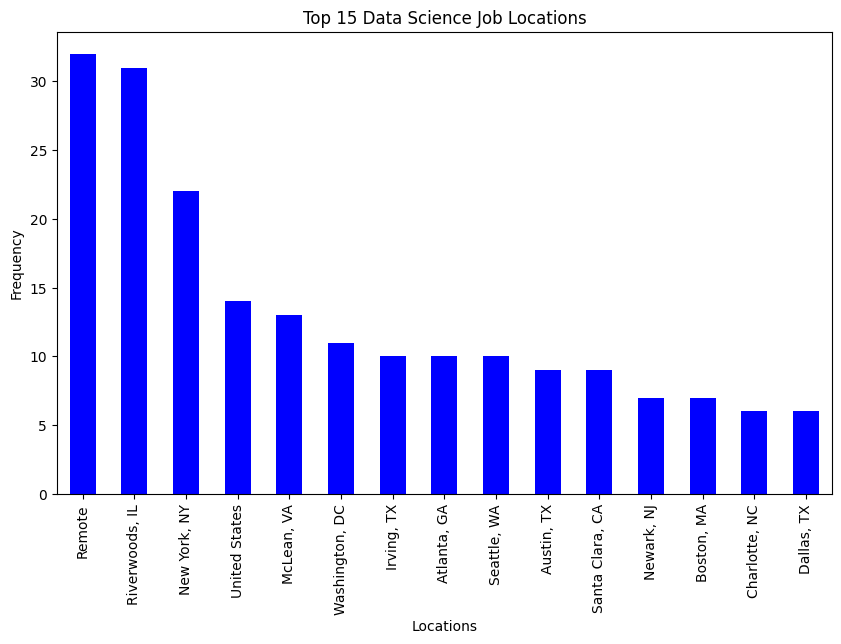

In [100]:
top_locations_counts = df_final['Location'].value_counts().head(15)

plt.figure(figsize=(10,6))
top_locations_counts.plot(kind='bar', color='blue')
plt.title('Top 15 Data Science Job Locations')
plt.xlabel('Locations')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Showcasing the salary distribution by job title.

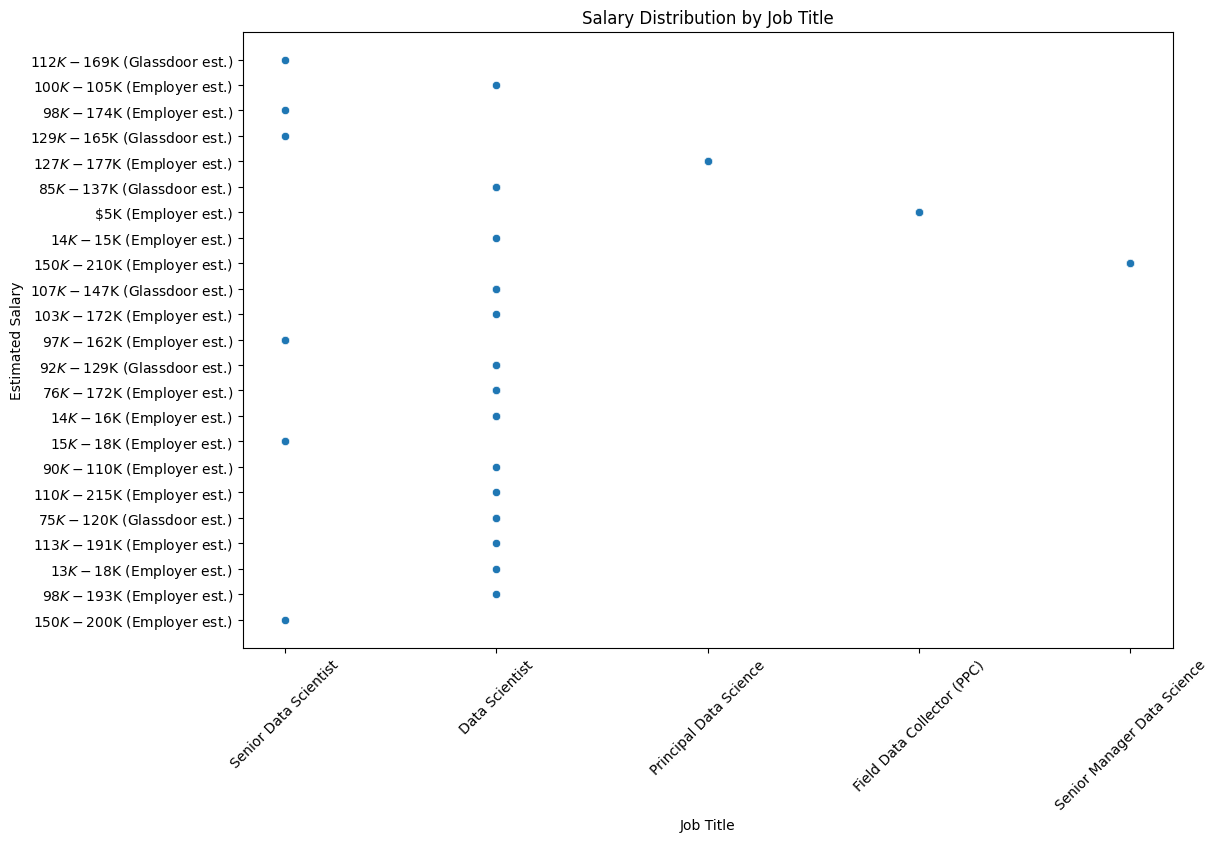

In [101]:
top_titles = df_final['Job Title'].value_counts().head(5).index
df_final = df_final[df_final['Job Title'].isin(top_titles)]

plt.figure(figsize=(12,8))
sns.scatterplot(x='Job Title', y='Salary', data=df_final)
plt.title('Salary Distribution by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Estimated Salary')
plt.xticks(rotation=45)
plt.show()